Plot and data that shows Simple Moving Averages of SPY with Bull and Bear crosses of the 9 and 50 SMA and 5 and 50 SMA.

The idea of the strategy is to enter a credit spread or near cross, using other SMAs as stop loss.

Strategy is still work in progress.

In [79]:
import yfinance as yf
import pandas as pd

In [80]:
def calculate_sma_cross(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    
    data['sma_9']=data['Close'].rolling(window=9).mean()
    data['sma_50']=data['Close'].rolling(window=50).mean()
    
    data['sma_diff'] = data['sma_9']-data['sma_50']
    
    data['Cross'] = (data['sma_diff']*data['sma_diff'].shift(1)<0)
    
    data['Cross_Type'] = None
    data.loc[data['Cross'] & (data['sma_diff'] > 0), 'Cross_Type'] = 'buy'
    data.loc[data['Cross'] & (data['sma_diff'] < 0), 'Cross_Type'] = 'sell'
    
    buy_num = len(data[data['Cross_Type'] == 'buy'])
    sell_num = len(data[data['Cross_Type'] == 'sell'])

    return buy_num, sell_num, data


    

In [81]:
if __name__=="__main__":
    ticker = "SPY"
    start_date = "2023-01-01"
    end_date = "2024-01-01"
    
    buys, sells, results = calculate_sma_cross(ticker, start_date, end_date,)
    
    print(f"Buys: {buys}")
    print(f"Sells: {sells}")
    print(f'Total (buys+sells): {buys+sells}')

[*********************100%%**********************]  1 of 1 completed

Buys: 3
Sells: 2
Total (buys+sells): 5


In [82]:
import pandas as pd
import yfinance as yf

# Download data (example for a specific ticker and date range)
ticker = "SPY"
data = yf.download(ticker, start="2023-01-01", end="2024-01-01")

# Calculate the SMAs and their difference
data['SMA_9'] = data['Close'].rolling(window=9).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_Diff'] = data['SMA_9'] - data['SMA_50']

# Identify crossovers
data['Cross'] = (data['SMA_Diff'] * data['SMA_Diff'].shift(1) < 0)

# List to store time differences and cross types
cross_times = []

# Loop through the data to find crossovers and calculate time between them
last_cross_time = None
last_cross_type = None  # To store the type of last crossover
for index, row in data.iterrows():
    if row['Cross']:
        if last_cross_time is not None:
            # Calculate time difference between current and previous crossover
            time_diff = index - last_cross_time
            cross_times.append((last_cross_time, index, time_diff.days, last_cross_type))  # Store start, end, days, type
        
        # Determine the type of crossover
        if row['SMA_Diff'] > 0:
            cross_type = 'Bullish'  # SMA_9 is above SMA_50
        else:
            cross_type = 'Bearish'  # SMA_9 is below SMA_50
        
        last_cross_time = index
        last_cross_type = cross_type

# Print the results
for start, end, time_diff, cross_type in cross_times:
    print(f"{cross_type} crossover from {start.date()} to {end.date()} took {time_diff} days.")


[*********************100%%**********************]  1 of 1 completed

Bullish crossover from 2023-04-04 to 2023-08-18 took 136 days.
Bearish crossover from 2023-08-18 to 2023-09-07 took 20 days.
Bullish crossover from 2023-09-07 to 2023-09-15 took 8 days.
Bearish crossover from 2023-09-15 to 2023-11-13 took 59 days.


[*********************100%%**********************]  1 of 1 completed


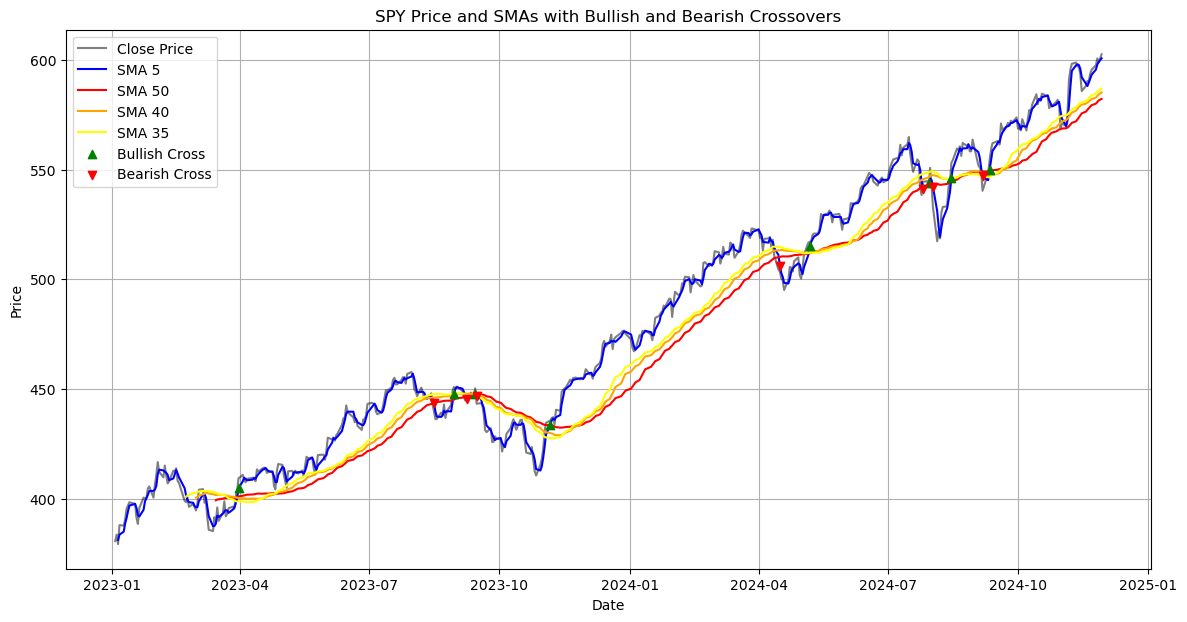

Bullish crossover from 2023-03-31 to 2023-08-16 took 138 days.
Bearish crossover from 2023-08-16 to 2023-08-30 took 14 days.
Bullish crossover from 2023-08-30 to 2023-09-08 took 9 days.
Bearish crossover from 2023-09-08 to 2023-09-14 took 6 days.
Bullish crossover from 2023-09-14 to 2023-09-15 took 1 days.
Bearish crossover from 2023-09-15 to 2023-11-06 took 52 days.
Bullish crossover from 2023-11-06 to 2024-04-16 took 162 days.
Bearish crossover from 2024-04-16 to 2024-05-07 took 21 days.
Bullish crossover from 2024-05-07 to 2024-07-26 took 80 days.
Bearish crossover from 2024-07-26 to 2024-07-30 took 4 days.
Bullish crossover from 2024-07-30 to 2024-08-02 took 3 days.
Bearish crossover from 2024-08-02 to 2024-08-15 took 13 days.
Bullish crossover from 2024-08-15 to 2024-09-06 took 22 days.
Bearish crossover from 2024-09-06 to 2024-09-11 took 5 days.


In [87]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Download data (example for a specific ticker and date range)
ticker = "SPY"
data = yf.download(ticker, start="2023-01-01", end="2024-12-01")

# Calculate the SMAs and their difference
data['SMA_5'] = data['Close'].rolling(window=3).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_40'] = data['Close'].rolling(window=40).mean()
data['SMA_35'] = data['Close'].rolling(window=35).mean()
data['SMA_Diff'] = data['SMA_5'] - data['SMA_50']

# Identify crossovers
data['Cross'] = (data['SMA_Diff'] * data['SMA_Diff'].shift(1) < 0)

# List to store crossover times and types
cross_times = []
bullish_crosses = []
bearish_crosses = []

# Loop through the data to find crossovers and calculate time between them
last_cross_time = None
last_cross_type = None  # To store the type of last crossover
for index, row in data.iterrows():
    if row['Cross']:
        if last_cross_time is not None:
            # Calculate time difference between current and previous crossover
            time_diff = index - last_cross_time
            cross_times.append((last_cross_time, index, time_diff.days, last_cross_type))  # Store start, end, days, type
        
        # Determine the type of crossover
        if row['SMA_Diff'] > 0:
            cross_type = 'Bullish'  # SMA_9 is above SMA_50
            bullish_crosses.append(index)
        else:
            cross_type = 'Bearish'  # SMA_9 is below SMA_50
            bearish_crosses.append(index)
        
        last_cross_time = index
        last_cross_type = cross_type

# Plotting the data
plt.figure(figsize=(14, 7))

# Plot the closing prices
plt.plot(data.index, data['Close'], label='Close Price', color='black', alpha=0.5)

# Plot the 9-period and 50-period SMAs
plt.plot(data.index, data['SMA_5'], label='SMA 5', color='blue')
plt.plot(data.index, data['SMA_50'], label='SMA 50', color='red')
plt.plot(data.index, data['SMA_40'], label='SMA 40', color='orange')
plt.plot(data.index, data['SMA_35'], label='SMA 35', color='yellow')

# Mark the bullish and bearish crossovers
plt.scatter(bullish_crosses, data.loc[bullish_crosses, 'SMA_5'], marker='^', color='green', label='Bullish Cross', zorder=5)
plt.scatter(bearish_crosses, data.loc[bearish_crosses, 'SMA_5'], marker='v', color='red', label='Bearish Cross', zorder=5)

# Add labels and title
plt.title(f'{ticker} Price and SMAs with Bullish and Bearish Crossovers')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

# Optionally, print the time between crossovers
for start, end, time_diff, cross_type in cross_times:
    print(f"{cross_type} crossover from {start.date()} to {end.date()} took {time_diff} days.")


Wait for confirmation before entry.